<a href="https://colab.research.google.com/github/klysman08/Machine-Learning/blob/master/Keras_with_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Carregando o modelo para aprendizado

In [0]:
import tensorflow.keras as keras
import numpy as np

In [27]:
import tensorflow as tf

print(tf.__version__)

1.15.0


###Carregando o bando de dados e atribuindo o dataframe de trino e teste

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

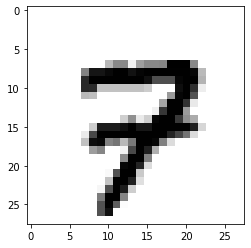

In [29]:
import matplotlib.pyplot as plt

plt.imshow(x_train[954],cmap=plt.cm.binary)
plt.show()

### Normalizando os dados de entrada. Por se tratar de uma imagen, o correto é normalizar esses atributos de 0 a 255.

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

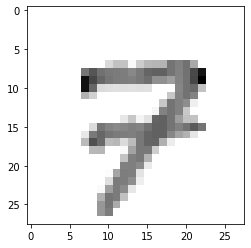

In [31]:
#Verificando se após a normalização o dado ainda corresponte a label correta. 

plt.imshow(x_train[954],cmap=plt.cm.binary)
plt.show()

###Criando um modelo sequecinal 
####É um tipo de modelo que aprende com o tempo.

In [0]:
model = tf.keras.models.Sequential()

In [0]:
#Precisamos transformar essa imagem de 28x28 em um array de 1x784 (28 vezes 28)(valor proporcional a matriz 28x28)
#O Keras tem uma função que faz isso.

model.add(tf.keras.layers.Flatten())

#Isso servirá como nossa camada de entrada. Irá pegar os dados e achatá-los.


###Criando as camadas ocultas
####Será uma camada densamente conectadas (totalmente conectada) - Cada nó da rede conecta a ao nó subsequente.

In [0]:
#Essa camada tem 128 nós. Sua função de ativação é a Relu (linear retificado) 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#Acrescentando outra camada de mesmas dimensões

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

####Camada de sáida

In [0]:
#Essa camada possui 10 nós. Um nó por previsão de qual será o numero. 
#A função softmax é semelhante a distribuição de probabilidade, de qual das possiveis opçoes de previsao esses dados que estamos passando é.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

###Entendendo a rede

In [0]:
#Como função de ativação temos o optimizer Adam (ótima opão para tratar grandes volumes de dados)
#Loss: A rede, na verdade, nao tenta maximizar a precisão, Ela tenta minimizar a perda. Neste caso estamos utilizado a entropia cruzada categorica.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###Treinando a rede

In [37]:
#A medida que treinamos podemos ver a perda e a melhora da precisão.

model.fit(x_train, y_train, epochs=10)

#Obter alta precisao e baixo errr de perde pode significar que o modelo aprendeu a classificar bem (generalizou), ou simplesmente memorizou todos os exemplos (overfiting)
#Por isso a necessidade de de testar com dados fora do treino.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2633 - acc: 0.9239
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1054 - acc: 0.9678
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0712 - acc: 0.9780
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0522 - acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0391 - acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0311 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0242 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0203 - acc: 0.9931
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss:

In [39]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.1137 - acc: 0.9735
0.1136637788841006
0.9735


###Salvando o modelo descrito acima

In [0]:
model.save('epic_num_reader.model')

###Carregando o modelo

In [43]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


###Fazendo as previsões sobre os dados de teste

In [0]:
predictions = new_model.predict(x_test)

In [54]:
print(predictions)

[[1.2676237e-16 2.2966348e-13 4.4502536e-13 ... 1.0000000e+00
  1.1319519e-15 2.6580065e-13]
 [1.2083252e-16 1.1802502e-10 1.0000000e+00 ... 2.8927876e-17
  4.0480002e-17 3.7122571e-26]
 [2.7987720e-13 9.9999917e-01 2.3901952e-08 ... 4.9393100e-07
  7.2129957e-08 1.1449299e-10]
 ...
 [1.0619353e-15 2.7978507e-13 5.6399868e-14 ... 4.3384745e-09
  1.2098750e-12 7.4309170e-08]
 [1.9765383e-15 2.8792118e-18 7.3417419e-15 ... 4.0246947e-14
  4.8126063e-09 3.1760831e-20]
 [9.8876463e-12 2.4717218e-15 1.8870723e-12 ... 1.1402027e-16
  6.7491711e-12 1.2774677e-17]]


In [62]:
import numpy as np

print(np.argmax(predictions[2356]))

1


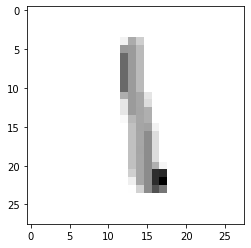

In [63]:
plt.imshow(x_test[2356],cmap=plt.cm.binary)
plt.show()